In [141]:
#|default_exp app

In [145]:
#|export
from fastai.vision.all import ImageDataLoaders, URLs, untar_data, get_image_files, Resize, \
    vision_learner, resnet34, error_rate, default_device, load_learner, show_image, PILImage
import torch
%matplotlib inline

In [121]:
print(torch.backends.mps.is_built())
print(torch.backends.mps.is_available())

True
True


In [123]:
#|export
path = untar_data(URLs.PETS)
path.ls()

(#3) [Path('/Users/quankento/.fastai/data/oxford-iiit-pet/.DS_Store'),Path('/Users/quankento/.fastai/data/oxford-iiit-pet/images'),Path('/Users/quankento/.fastai/data/oxford-iiit-pet/annotations')]

In [124]:
path

Path('/Users/quankento/.fastai/data/oxford-iiit-pet')

In [125]:
#|export
files = get_image_files(path/'images')

files[0]

Path('/Users/quankento/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

In [126]:
#|export
def label_func(fn:str): 
    return fn[0].isupper()

In [147]:
#|export
dls = ImageDataLoaders.from_name_func(path/'images', fnames=files, label_func=label_func,
                                      item_tfms=Resize(224), device=default_device(1)) 

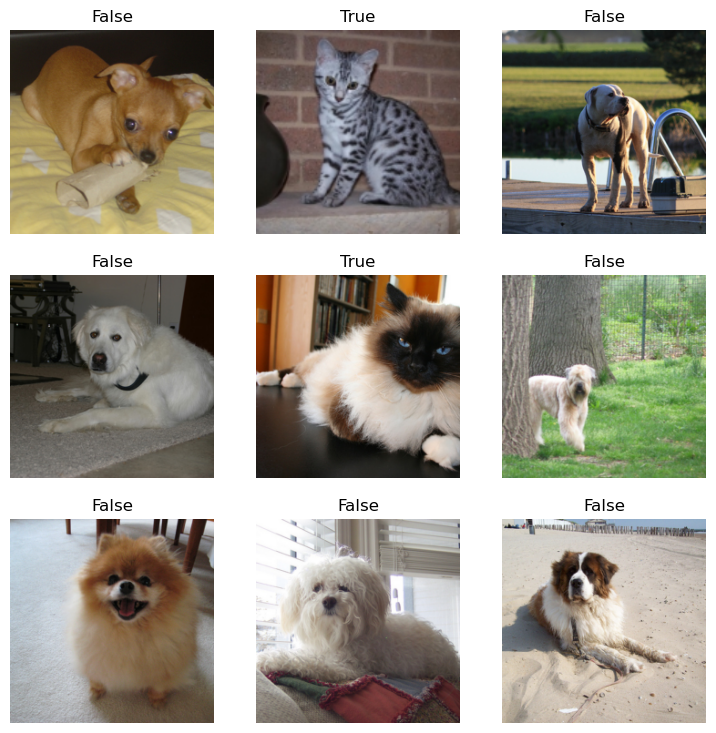

In [149]:
dls.show_batch()

In [129]:
#|export
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.175336,0.020547,0.005413,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.053354,0.018639,0.006089,01:00


In [130]:
learn.show_results()

In [132]:
learn.predict(files[0])

('True', tensor(1), tensor([4.9553e-11, 1.0000e+00]))

In [157]:
model = load_learner('./model.pkl')

In [158]:
#|export
import gradio as gr
categories = ('dog', 'cat')
def image_classifier(input): 
    pred, idx, probs = model.predict(input) 
    result = dict(zip(categories, map(float, probs)))
    print('result', result)
    return result



gr.Interface(fn=image_classifier,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(),
             examples=['./cat.jpeg', './dog.jpg']).launch(share=True)

Running on local URL:  http://127.0.0.1:7876
Running on public URL: https://402a428e751c54587b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


result {'dog': 4.2980434330175366e-16, 'cat': 1.0}


### Export

In [151]:
from nbdev.export import nb_export
nb_export('./cat_classifier.ipynb', '.')
print('Export successful')

Export successful


In [138]:
!cat app.py

# AUTOGENERATED! DO NOT EDIT! File to edit: cat_classifier.ipynb.

# %% auto 0
__all__ = []

# %% cat_classifier.ipynb 1
from fastai.vision.all import ImageDataLoaders, URLs, untar_data, get_image_files, Resize, \
    vision_learner, resnet34, error_rate, default_device, load_learner, show_image, PILImage
import torch


In [152]:
torch.__version__

'2.1.2'

In [153]:
import fastai

In [154]:
fastai.__version__

'2.7.13'

In [155]:
import gradio
gradio.__version__

'4.13.0'